# Usage for ColorTransfer using the WFR package

In [1]:
import ColorTransfer
import numpy as np
import matplotlib.pyplot as plt
import time

Import images for color transfer 

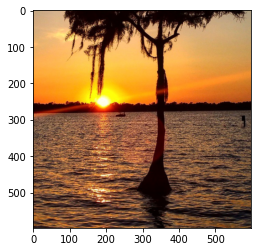

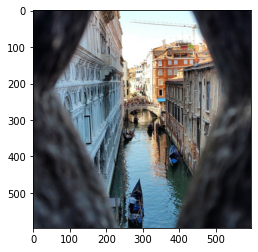

In [2]:
img1= ColorTransfer.Image(r"data\Lake.png",n_segments=1024)
img2= ColorTransfer.Image(r"data\Venice.png",n_segments=1024)
img1.visualizeImage()
img2.visualizeImage()

Choose parameters for the distance computation.

In [3]:
NoIterations=1000  # Maximum number of iterations before the algorithm terminates
eps = 1e-6         # Minimum relative increase the algorithm terminates

Now we will compute the WFR distance using Algorithm 1 from *The Square Root Normal Field Metric and Unbalanced Optimal Transport*.

In [4]:

totalMass1=np.sum(img1.meas.masses)
totalMass2=np.sum(img2.meas.masses)

timestart = time.time();
dist,cost,ind,P,Q=img1.colorDistance(img2,NoIterations,eps)
totaltime=time.time()-timestart

print("The distance is computed to be: {}+{}-2{}={}".format(totalMass1,totalMass2,cost[ind,0],dist.cpu()[0]))
print("The algorithm took {} iterations to terminate.".format(ind))
print("The algorithm took {} seconds to converge.".format(totaltime))

The distance is computed to be: 287465.0783533028+265591.87735877617-2252702.5992743748=218.29282435144296
The algorithm took 441 iterations to terminate.
The algorithm took 1.7408864498138428 seconds to converge.


Now we can plot color transfer.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


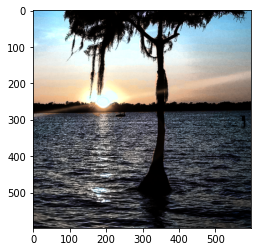

In [5]:
nimg1=img1.colorizeFromMap(P,img2)
nimg1.visualizeImage()

We can also compute the approximate convergence rate at each iteration.

# Complete Documentation of ColorTransfer.py below

In [6]:
help(ColorTransfer)

Help on module ColorTransfer:

NAME
    ColorTransfer

CLASSES
    builtins.object
        Image
    
    class Image(builtins.object)
     |  Image(filename=None, img=None, n_segments=1024)
     |  
     |  Methods defined here:
     |  
     |  __init__(self, filename=None, img=None, n_segments=1024)
     |      Init        
     |      ----------
     |      PLShape Object
     |          returns a Shape Object itialized from a PNG file or a numpy array
     |      ----------
     |      Parameters
     |      ----------
     |      n_segments : int
     |          maximum number of supports for the associated measure
     |  
     |  colorDistance(self, image2, NoIterations, eps)
     |      Parameters
     |      ----------
     |      image2 : Image Object
     |          target image
     |      ----------
     |      NoIterations : int
     |          maximum number of iterations for the WFR algorithm
     |      ----------
     |      eps : float
     |          minimum increa